## Pregunta 6

In [1]:
import numpy as np
import camb
import matplotlib.pyplot as plt

In [2]:
pars = camb.set_params(
    H0 = 67.5
)

In [35]:
pars.set_for_lmax(5000, lens_potential_accuracy=1)
pars.WantTensors= True
pars.WantTransfer = True
results = camb.get_transfer_functions(pars)

In [46]:

results.get_matter_transfer_data().transfer_data[1]

array([[2.31989175e+06, 2.36386625e+06, 2.40952900e+06, ...,
        1.60453620e+07, 1.78225740e+07, 1.98157060e+07],
       [2.31989125e+06, 2.36386600e+06, 2.40952850e+06, ...,
        1.60453570e+07, 1.78225680e+07, 1.98157000e+07],
       [2.31989075e+06, 2.36386550e+06, 2.40952800e+06, ...,
        1.60453520e+07, 1.78225620e+07, 1.98156940e+07],
       ...,
       [9.77906677e+02, 9.96148987e+02, 1.01509045e+03, ...,
        6.65172998e+03, 7.38492285e+03, 8.20695508e+03],
       [5.69550781e+02, 5.80175415e+02, 5.91207275e+02, ...,
        3.87407861e+03, 4.30110156e+03, 4.77986670e+03],
       [3.30100464e+02, 3.36258301e+02, 3.42652100e+02, ...,
        2.24532666e+03, 2.49281885e+03, 2.77029956e+03]],
      shape=(257, 50), dtype=float32)

Text(0.5, 0, '$\\ell$')

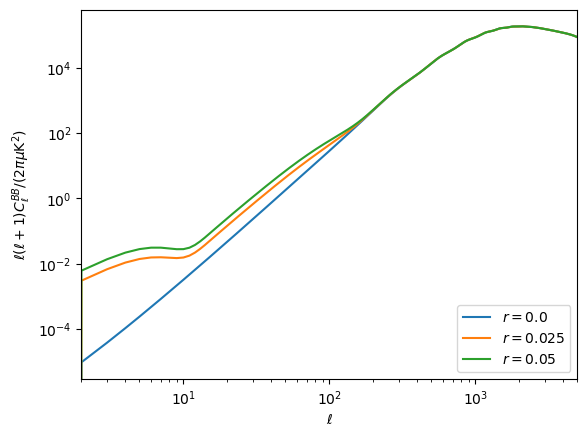

In [47]:
lmax = 5000
rs = np.linspace(0,0.05,3)

for r in rs:
    inflation_params = camb.initialpower.InitialPowerLaw()
    inflation_params.set_params(ns = 0.96, r= r)
    results.power_spectra_from_transfer(inflation_params)
    cl = results.get_total_cls(lmax, CMB_unit='muK')
    plt.loglog(np.arange(lmax+1), np.arange(lmax+1)*(np.arange(lmax+1) +1)*cl[:,2])
plt.xlim([2,lmax])
plt.legend(['$r = %s$' % r for r in rs], loc='lower right')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/ (2\pi \mu{\rm K}^2)$')
plt.xlabel(r'$\ell$')